In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = "../Dataset/wine-reviews/"
file1 = "winemag-data_first150k.csv"
file2 = "winemag-data-130k-v2.csv"
file3 = "winemag-data-130k-v2.json"

In [5]:
csv_150k = pd.read_csv(path + file1, index_col=0)
csv_130k = pd.read_csv(path + file2, index_col=0)

In [6]:
csv_150k.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


In [7]:
csv_130k.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


# 数据可视化和摘要
## 数据摘要  
### 标称属性（存疑，未完成）
* country、province、region_1、region_2、variety、winery
* 给出每个可能聚会的频数  

In [30]:
csv_150k.country.value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [70]:
csv_150k.price.value_counts() # 357

20.0     7860
15.0     7056
18.0     5988
25.0     5955
30.0     5449
         ... 
740.0       1
545.0       1
351.0       1
698.0       1
588.0       1
Name: price, Length: 357, dtype: int64

### 数值属性
#### winemag-data_first150k.csv：
* 数值属性有：points，price
* 5数概括通过`describe()`函数给出（如下所示）： 
  
||min | Q1 | 中位数 | Q3 | max|  
| :-: | :--: | :--: | :--: | :--: | :--: |   
|points | 80 | 86 | 88 | 90 | 100 |  
|price | 4 | 16| 24 | 40 | 2300 | 

* 缺失值的个数通过`info()`函数给出（如下所示）：**points**没有缺失值，**price**缺失值为**13695**个

In [8]:
csv_150k.info()
csv_150k.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


#### winemag-data_130k-v2.csv：
* 数值属性有：points，price
* 5数概括通过`describe()`函数给出（如下所示）： 
  
||min | Q1 | 中位数 | Q3 | max|  
| :-: | :--: | :--: | :--: | :--: | :--: |   
|points | 80 | 86 | 88 | 91 | 100 |  
|price | 4 | 17| 25 | 42 | 3000 | 

* 缺失值的个数通过`info()`函数给出（如下所示）：**points**没有缺失值，**price**缺失值为**8996**个

In [9]:
csv_130k.info()
csv_130k.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


## 数据可视化
### 直方图
#### winemag-data_first150k.csv：

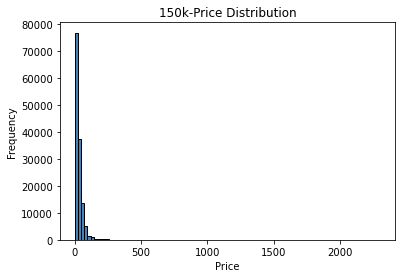

In [13]:
plt.hist(x = csv_150k.price, bins = 100, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('150k-Price Distribution')
plt.show()

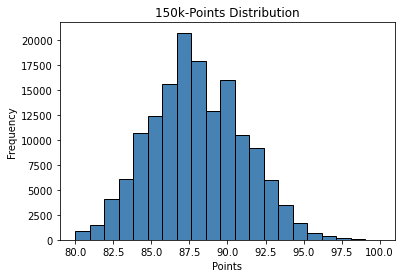

In [14]:
plt.hist(x = csv_150k.points, bins = 21, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('150k-Points Distribution')
plt.show()

#### winemag-data_130k-v2.csv：

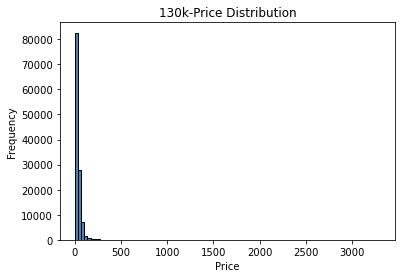

In [15]:
plt.hist(x = csv_130k.price, bins = 100, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('130k-Price Distribution')
plt.show()

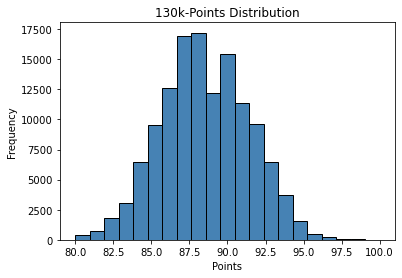

In [16]:
plt.hist(x = csv_130k.points, bins = 21, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('130k-Points Distribution')
plt.show()

### 盒图
#### winemag-data_first150k.csv：

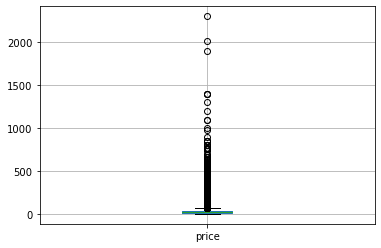

In [17]:
price_150k = pd.DataFrame(csv_150k.price)
price_150k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

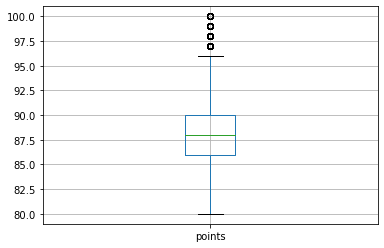

In [18]:
points_150k = pd.DataFrame(csv_150k.points)
points_150k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

#### winemag-data_130k-v2.csv：

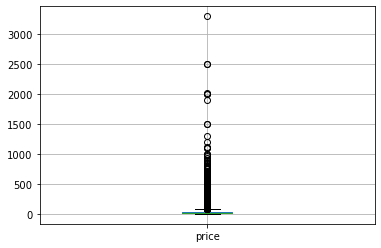

In [19]:
price_130k = pd.DataFrame(csv_130k.price)
price_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

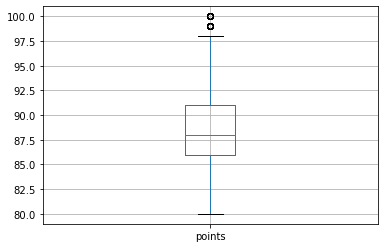

In [20]:
points_130k = pd.DataFrame(csv_130k.points)
points_130k.boxplot(sym = 'o')  # 中间箱体是否缺口) #也可用plot.box()
plt.show()

# 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理: 
*注意：在处理后，要可视化地对比新旧数据集。*
## 将缺失部分剔除

## 用最高频率值来填补缺失值

## 通过属性的相关关系来填补缺失值

## 通过数据对象之间的相似性来填补缺失值 